<a href="https://colab.research.google.com/github/2303a51978/AIML_25_B15/blob/main/lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fetch_openml(data_id=10)

{'data':     lymphatics block_of_affere bl_of_lymph_c bl_of_lymph_s by_pass  \
 0       arched             yes            no            no      no   
 1    displaced             yes            no            no     yes   
 2     deformed              no            no            no     yes   
 3       arched              no            no            no      no   
 4       arched              no            no            no      no   
 ..         ...             ...           ...           ...     ...   
 143  displaced              no            no            no      no   
 144   deformed              no            no            no      no   
 145   deformed             yes            no            no     yes   
 146   deformed             yes            no            no      no   
 147     arched              no            no            no      no   
 
     extravasates regeneration_of early_uptake_in  lym_nodes_dimin  \
 0             no              no             yes                1  

In [ ]:
fetch_openml(name='car')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name car exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=991
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=40975

  warn(warning_msg)


{'data':      buying  maint  doors persons lug_boot safety
 0     vhigh  vhigh      2       2    small    low
 1     vhigh  vhigh      2       2    small    med
 2     vhigh  vhigh      2       2    small   high
 3     vhigh  vhigh      2       2      med    low
 4     vhigh  vhigh      2       2      med    med
 ...     ...    ...    ...     ...      ...    ...
 1723    low    low  5more    more      med    med
 1724    low    low  5more    more      med   high
 1725    low    low  5more    more      big    low
 1726    low    low  5more    more      big    med
 1727    low    low  5more    more      big   high
 
 [1728 rows x 6 columns],
 'target': 0       P
 1       P
 2       P
 3       P
 4       P
        ..
 1723    N
 1724    N
 1725    P
 1726    N
 1727    N
 Name: binaryClass, Length: 1728, dtype: category
 Categories (2, object): ['N', 'P'],
 'frame':      buying  maint  doors persons lug_boot safety binaryClass
 0     vhigh  vhigh      2       2    small    low           P

In [ ]:
car_data=fetch_openml(name='car',version=2,parser='auto')

In [ ]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
car_data = car_data

In [ ]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [ ]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
type (car_data)

pandas.core.frame.DataFrame

<Axes: xlabel='binaryClass', ylabel='count'>

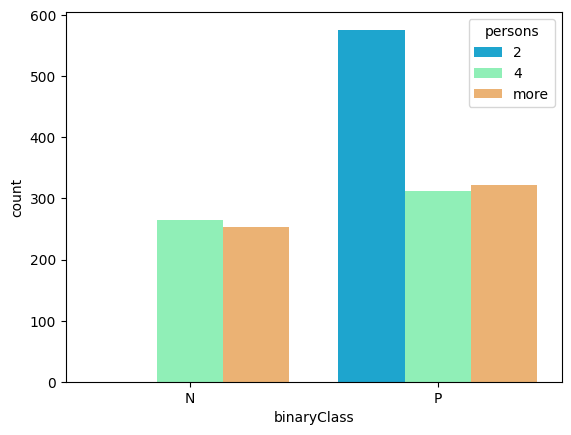

In [ ]:
sns.countplot(x=car_data.binaryClass,hue='persons',data=car_data,palette='rainbow')

<Axes: xlabel='binaryClass', ylabel='count'>

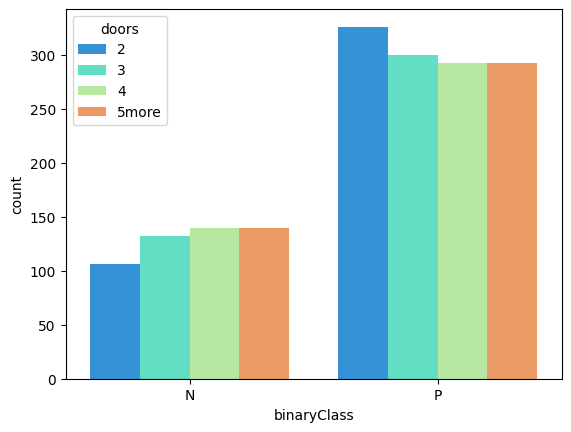

In [29]:
sns.countplot(x=car_data.binaryClass,hue='doors',data=car_data,palette='rainbow')

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.2,random_state=20)
#print('Dataset size:{}\ntraining data is: {}\ntesting data is: {}'.format(len(car_data),len(train_data),len(test_data)))
car_data.shape,train_data.shape,test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [30]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,med,med,2,2,med,low,P
freq,364,351,359,471,467,462,978


In [31]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [ ]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [32]:
train_data['buying'].value_counts()

,count
buying,
med,364
high,345
vhigh,343
low,330


In [33]:
train_data['maint'].value_counts()

,count
maint,
med,351
high,349
vhigh,344
low,338


In [34]:
train_data['doors'].value_counts()

,count
doors,
2,359
5more,350
4,347
3,326


In [35]:
car_train = train_data.drop('binaryClass', axis =1)
car_labels = train_data[['binaryClass']]

In [36]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)

In [37]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
car_train_prepared.shape, car_labels_prepared.shape

((1382, 6), (1382,))

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [40]:
from sklearn.tree import export_text
text_representation = export_text(dt_clf,
                                  feature_names=list(car_train.columns))
print(text_representation)

|--- persons <= 0.50
|   |--- class: 1
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- buying >  0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- persons >  1.50
|  

In [41]:
from sklearn.metrics import accuracy_score, classification_report,\
 confusion_matrix
preds = dt_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:\n{classification_report(car_labels_prepared, preds)}")

print(f"Confusion Matrix:\n{confusion_matrix(car_labels_prepared, preds)}")

Accuracy:1.0
ClassReport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:
[[404   0]
 [  0 978]]


In [42]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

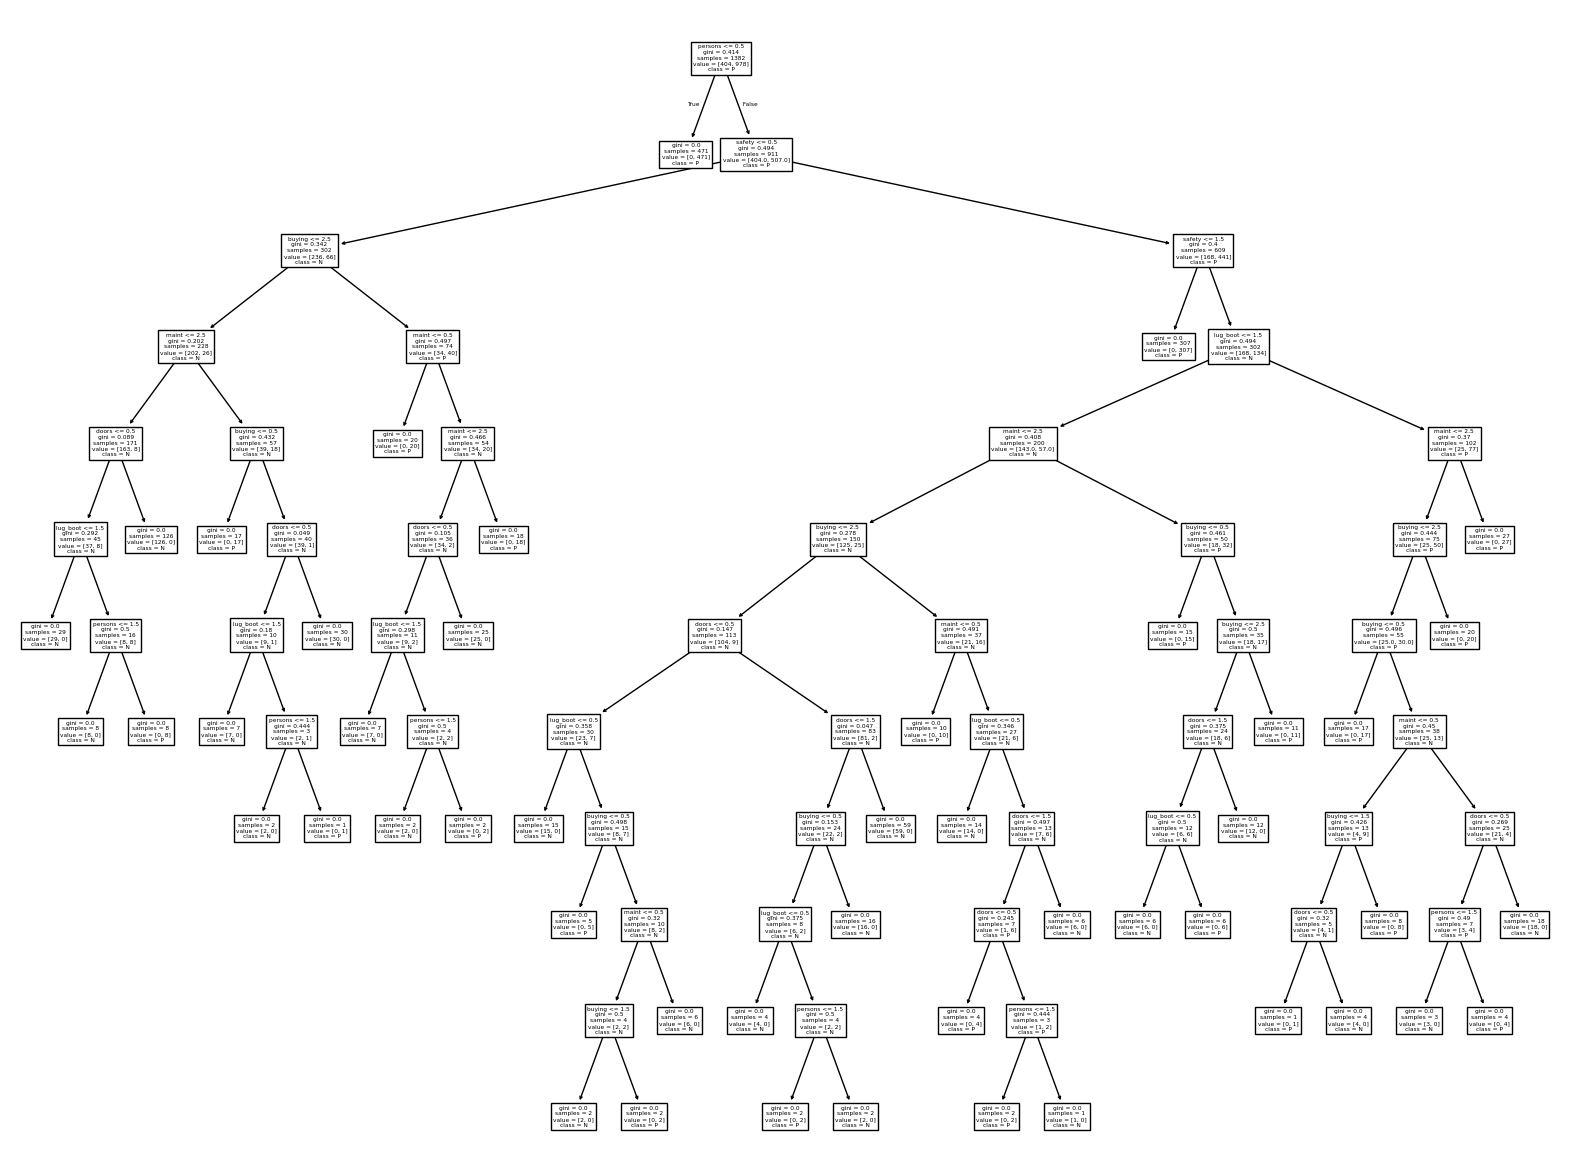

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt_clf, feature_names=car_train.columns,
          class_names=['N','P']);